**This is a notebook comparing different species of iris**

In [1]:
# Importing Packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from pandas import DataFrame,Series
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Iris.csv
database.sqlite



In [2]:
f=pd.read_csv("../input/Iris.csv")

In [3]:
data=DataFrame(f)
data.head()[:2]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


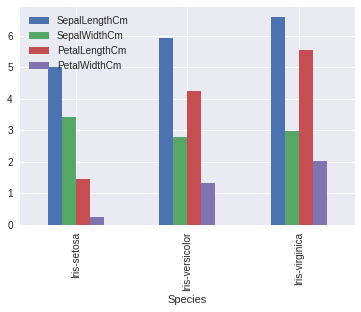

In [4]:
# Lets make a barplot to see how the features are varying across different species

mat=data.groupby(['Species']).mean()
X=mat.drop(['Id'],axis=1)
X.plot(kind='bar')

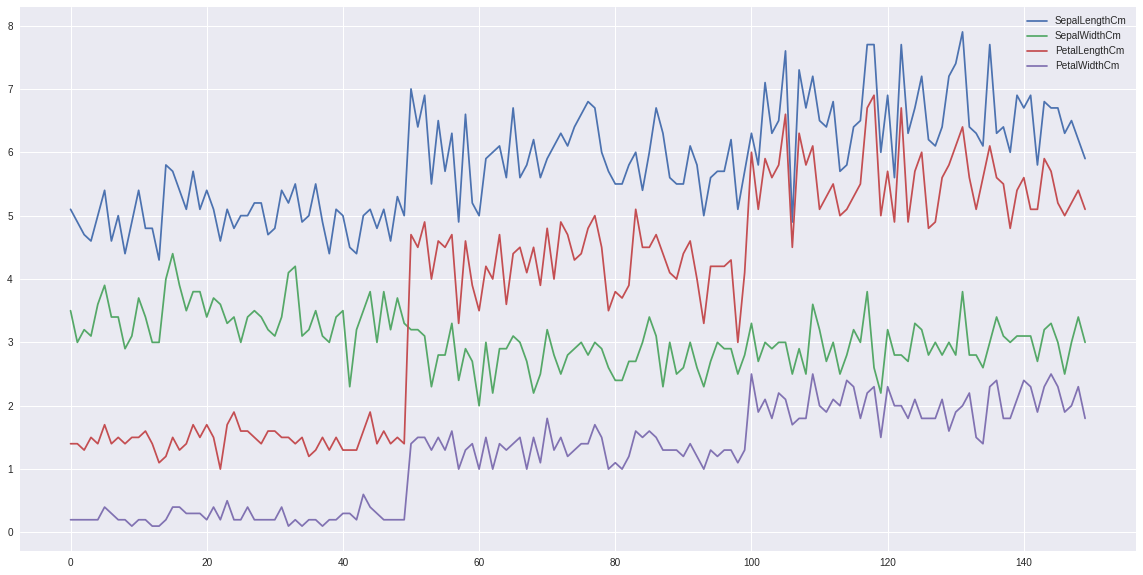

In [5]:
# How features are varying with each data input

plt.figure(figsize=(20,10))
plt.plot(data['SepalLengthCm'])
plt.plot(data['SepalWidthCm'])
plt.plot(data['PetalLengthCm'])
plt.plot(data['PetalWidthCm'])
plt.legend(loc='best')

**Comparing individual features of species**

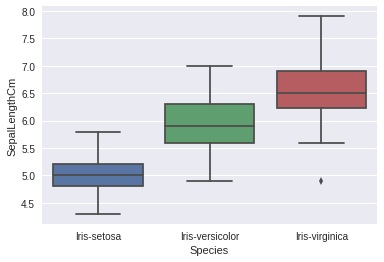

In [6]:
# Boxplot showing  SepalLengthCm against Species 
sns.boxplot(x="Species", y="SepalLengthCm", data=data)

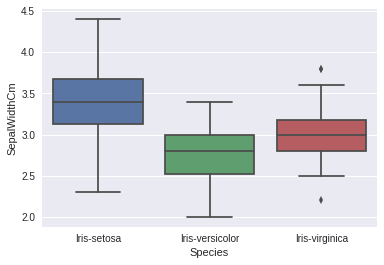

In [7]:
# Boxplot showing  SepalWidthCm against Species
sns.boxplot(x="Species", y="SepalWidthCm", data=data)

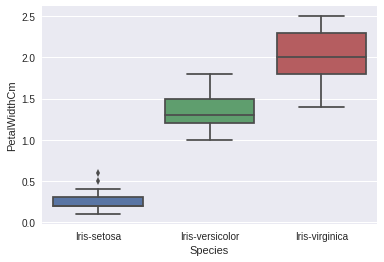

In [8]:
# Boxplot showing  PetalWidthCm against Species
sns.boxplot(x="Species",y="PetalWidthCm",data=data)

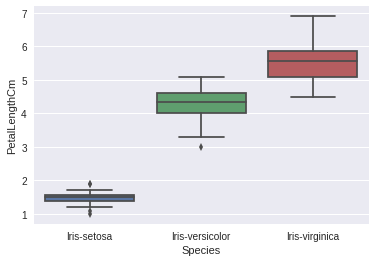

In [9]:
# Boxplot showing  PetalLengthCm against Species
sns.boxplot(x="Species",y="PetalLengthCm",data=data)

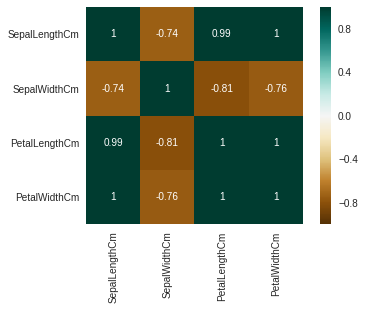

In [10]:
# Lets see how different features wrt each other
cov=X.corr(method='pearson')
sns.heatmap(cov,vmax=1,square=True,annot=True,cmap='BrBG')

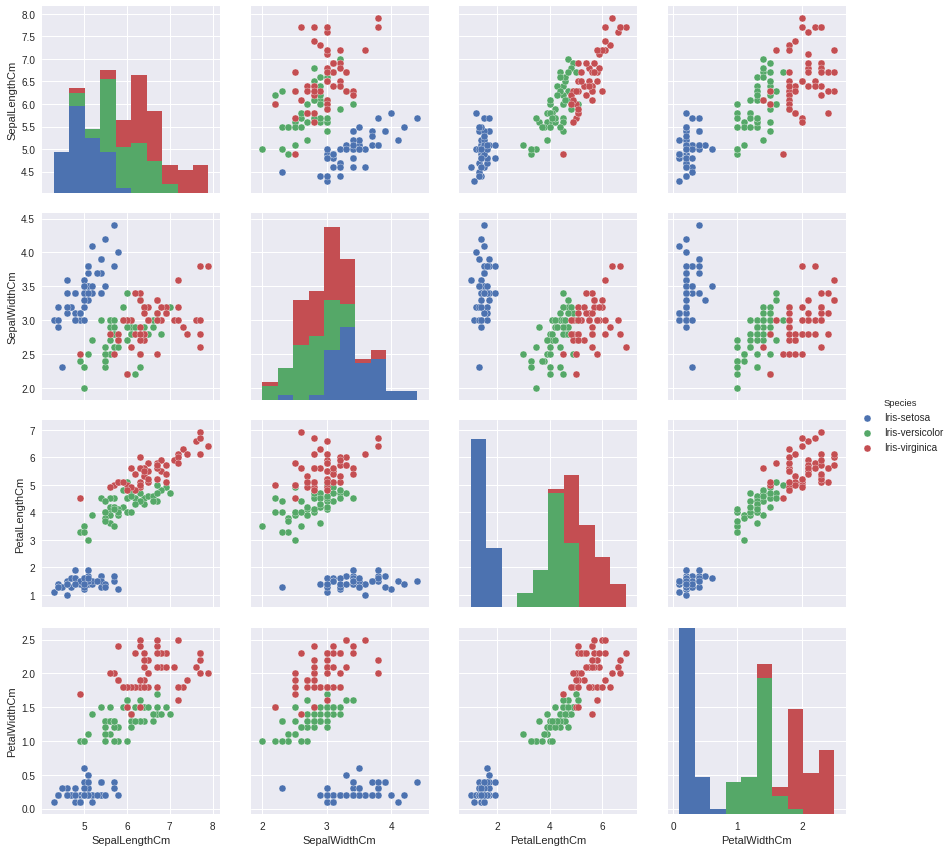

In [11]:
# Pairlplot will give us detailed information about how the features are varying with data anf Species if iris

sns.pairplot(data.drop("Id", axis=1), hue="Species", size=3)



KMeans in picture
-----------


In [12]:
y=data['Species']
X_train=data.drop(['Id','Species'],axis=1)
X_Train=X_train.values[:,:2]

In [13]:
num_clusters = 3
model = KMeans(n_clusters=num_clusters)
model.fit(X_Train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
labels = model.labels_
cluster_centers = model.cluster_centers_

y=y.replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])
Y=list(y)
print(cluster_centers)

[[ 6.81276596  3.07446809]
 [ 5.006       3.418     ]
 [ 5.77358491  2.69245283]]


/opt/conda/bin/ipython:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/opt/conda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


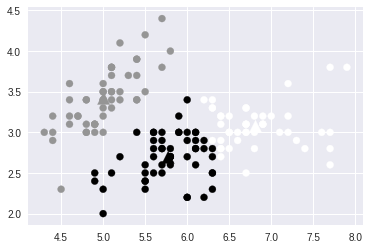

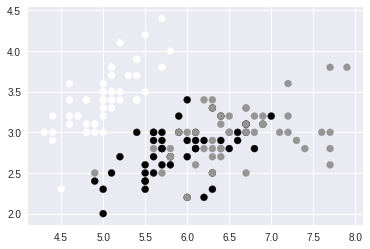

In [15]:
plt.scatter(X_Train[:,0], X_Train[:,1],c=labels.astype(np.float))
plt.hold(True)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c = np.arange(num_clusters), marker = '^', s = 150)
plt.show()
plt.scatter(X_Train[:,0], X_Train[:,1],c=np.choose(Y,[0,2,1]))
plt.show()